Banglore house price prediction

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler


In [9]:
df2=pd.read_csv("C:\\Users\\rushi\\OneDrive\\Desktop\\DATA SCIENCE\\Data sets\\regression data set\\Linear\\bangalore house price prediction OHE-data.csv")

In [10]:
df2.head(4)

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'realtionship betwwen Price and Price per square foot')

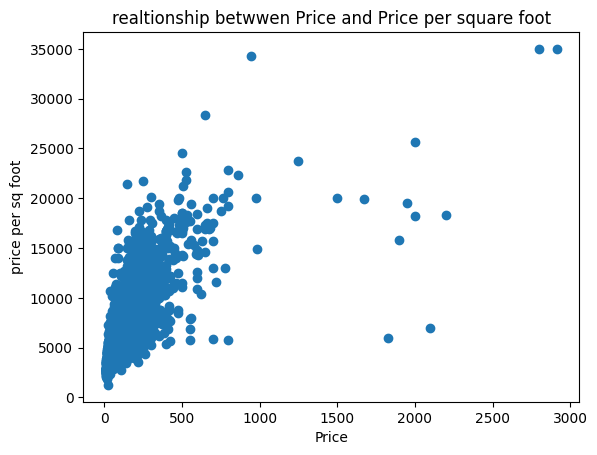

In [ ]:
plt.scatter(df2['price'],df2['price_per_sqft'])
plt.xlabel('Price')
plt.ylabel('price per sq foot')
plt.title('realtionship betwwen Price and Price per square foot')
#There is no relationship between price and price per square foot as the graph is scattered.

In [12]:
import plotly.express as exp

In [13]:
exp.scatter(df2,x='price',y='price_per_sqft')


In [14]:
exp.scatter(df2,x='price',y='price_per_sqft')


In [15]:
#use co relation for finding a relation of variables target and feature for linear regression
relation=df2['price'].corr(df2['price_per_sqft'])
print(relation)

0.7178207998305701


In [ ]:
#using r2score for corelation
X=df2[['price','bhk','total_sqft_int','location_Kalena Agrahara','location_Horamavu Agara','location_Vidyaranyapura','location_BTM 2nd Stage','location_Hebbal Kempapura','location_Hosur Road','location_Horamavu Banaswadi','location_Domlur','location_Mahadevpura','location_Tumkur Road','availability_Ready To Move']]
y=df2['price_per_sqft']
model=LinearRegression()
model.fit(X,y)
pred=model.predict(X)
print('R2 Score is: ',r2_score(y,pred))  #the result is 0.51. if r2score is 1.0 its strong realtionship if r2score is 0.1 then its weak or no relationship.
#We can also add features to increase the relationship.

R2 Score is:  0.6434272016746578


In [17]:
#now testing the whole dataset when our r2score increase to 0.64
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,train_size=0.70)
newmodel=LinearRegression()
newmodel.fit(X_train,y_train)
pred=newmodel.predict(X_test)
pd.DataFrame({'ACT':y_test,'PRED':pred})

,ACT,PRED
960,4072.790295,5045.315042
132,4934.210526,5258.708935
2431,5425.709516,5412.902109
2229,11206.896552,9913.096026
4503,3560.830861,4964.692423
...,...,...
3774,4199.019608,5173.528555
6818,6498.989899,5529.224073
1973,5200.000000,5726.943223
336,4687.500000,5148.409901


In [18]:
print(r2_score(y_test,pred))

0.6449976608818453


In [ ]:
#NOW we want to increase the accuracy of the model so removing the ouliers from our data.
#1. Using the IQR technique.

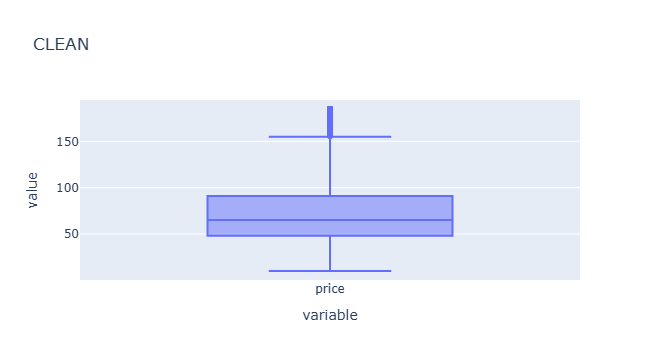

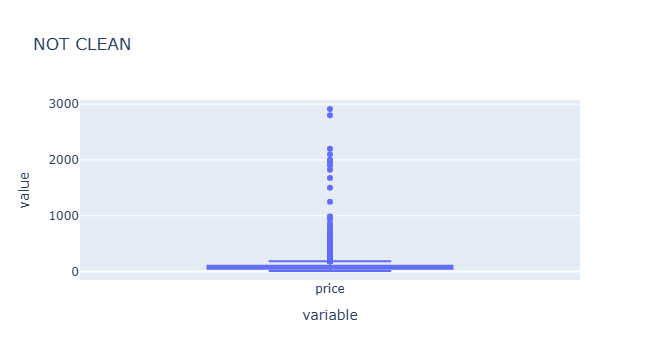

(7120,)
(6513, 14)


In [ ]:
import seaborn as sns
import plotly.express as exp
exp.box(X['price'])
q1=X['price'].quantile(0.25)
q3=X['price'].quantile(0.75)
IQR=q3-q1
upperfence=q3+1.5*IQR
lowerfence=q1-1.5*IQR
clean=X[(X['price']<=upperfence) & (X['price'] >=lowerfence)]
clean_out=exp.box(clean['price'],title='CLEAN')
previous_out=exp.box(df2['price'],title='NOT CLEAN')
clean_out.show()
previous_out.show()
print(X['price'].shape)
print(clean.shape)
#This shows the differnce between the old data and clean data.

In [44]:
def remove_outliers_iqr_all(df):
    numeric_cols = df.select_dtypes(include=['number']).columns
    clean_df = df.copy()
    for col in numeric_cols:
        Q1 = clean_df[col].quantile(0.25)
        Q3 = clean_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
        clean_df = clean_df[(clean_df[col] >= lower) & (clean_df[col] <= upper)]
    return clean_df

clean_df=remove_outliers_iqr_all(df2)
clean_df.head(5)

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,2.0,2.0,40.0,1170.0,2,3418.803419,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,2.0,2.0,65.0,1425.0,3,4561.403509,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Now we get the clean df now substituting this in model.
lgr=LinearRegression()
X=clean_df[['bath','balcony','price','total_sqft_int','bhk']]
y=clean_df['price_per_sqft']

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.80,random_state=42)
lgr.fit(X_train,y_train)


LinearRegression()

In [58]:
y_pred=lgr.predict(X_test)
pd.DataFrame({'Act':y_test,'pred':y_pred})

,Act,pred
5962,4308.681672,4177.108283
5133,3999.137931,4109.792775
4145,4444.000000,4435.648253
5151,6878.698225,6623.161734
3969,5800.000000,5639.356222
...,...,...
3187,4545.454545,4556.595663
557,7274.490786,8182.700222
4571,4285.714286,4422.840553
1344,7302.631579,7343.015972


In [59]:
print(r2_score(y_test,y_pred))

0.939924914533134


In [ ]:
#2.Using robust scaler technique for outliers.

In [60]:
from sklearn.preprocessing import RobustScaler
robscaler=RobustScaler()
scaled=robscaler.fit_transform(df2)
lgr2=LinearRegression()
X_sc=df2[['bath','balcony','price','total_sqft_int','bhk']]
y_sc=df2['price_per_sqft']

X_train,X_test,y_train,y_test=train_test_split(X_sc,y_sc,train_size=0.80,random_state=42)
lgr2.fit(X_train,y_train)



LinearRegression()

In [61]:
y_pred=lgr2.predict(X_test)
print(r2_score(y_test,y_pred))

0.728510417036955


In [ ]:
#now, we have 2 models 1.lgr which is done by IQR, and 2.lg2 whic is done by RobustScaler.

In [ ]:
#Now we are going towards deployment using Pickle for saving file.

In [66]:
#save our model1:
import pickle
filename='savemodel.sav'
pickle.dump(lgr,open(filename,'wb')) #'w is write mode (you are writing a new file).b → binary mode (the file will be written in binary format, not plain text).

In [ ]:
load_model=pickle.load(open(filename,'rb'))
clean_df.head(5)

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,...,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,2.0,2.0,40.0,1170.0,2,3418.803419,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,2.0,2.0,65.0,1425.0,3,4561.403509,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [68]:
load_model.predict([[3.0,2.0,150,1750.0,3]])

C:\Users\rushi\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([9288.93372464])